In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings 

warnings.filterwarnings("ignore")

/Users/shashanksingh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/shashanksingh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 7)
df = pd.read_csv("final_dataset.csv", index_col='time', parse_dates=True)
df.tail()

,pm2_5,temperature_2m,relativehumidity_2m,precipitation,windspeed_10m,city
time,,,,,,
2025-10-24 19:00:00,17.6,22.2,85,0.0,6.4,bangalore
2025-10-24 20:00:00,18.4,21.9,86,0.0,7.0,bangalore
2025-10-24 21:00:00,24.2,21.6,88,0.0,7.6,bangalore
2025-10-24 22:00:00,27.8,21.1,91,0.0,7.8,bangalore
2025-10-24 23:00:00,20.0,20.9,93,0.0,6.3,bangalore


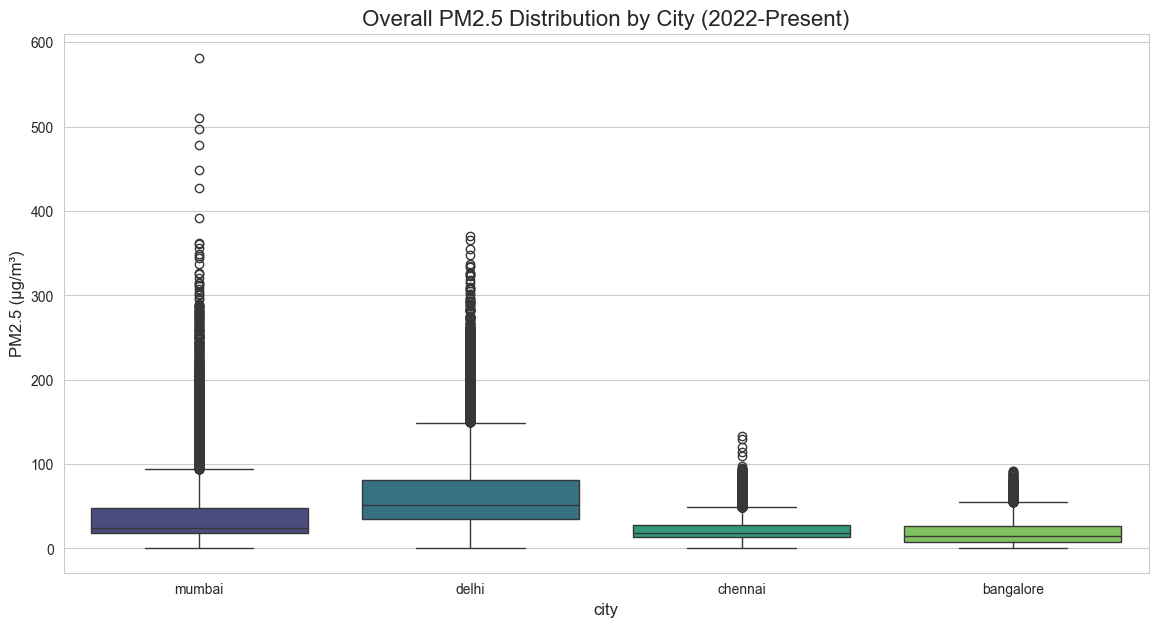

In [3]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='city', y='pm2_5', data=df, palette='viridis')
plt.title('Overall PM2.5 Distribution by City (2022-Present)', fontsize=16)
plt.xlabel('city', fontsize=12)
plt.ylabel('PM2.5 (μg/m³)', fontsize=12)
plt.show()

In [14]:
df[(df['city'] == 'mumbai') & (df['pm2_5'] >550)]

,pm2_5,temperature_2m,relativehumidity_2m,precipitation,windspeed_10m,city,month,hour
time,,,,,,,,
2023-03-13 15:00:00,581.1,33.0,39,0.0,13.6,mumbai,3,15


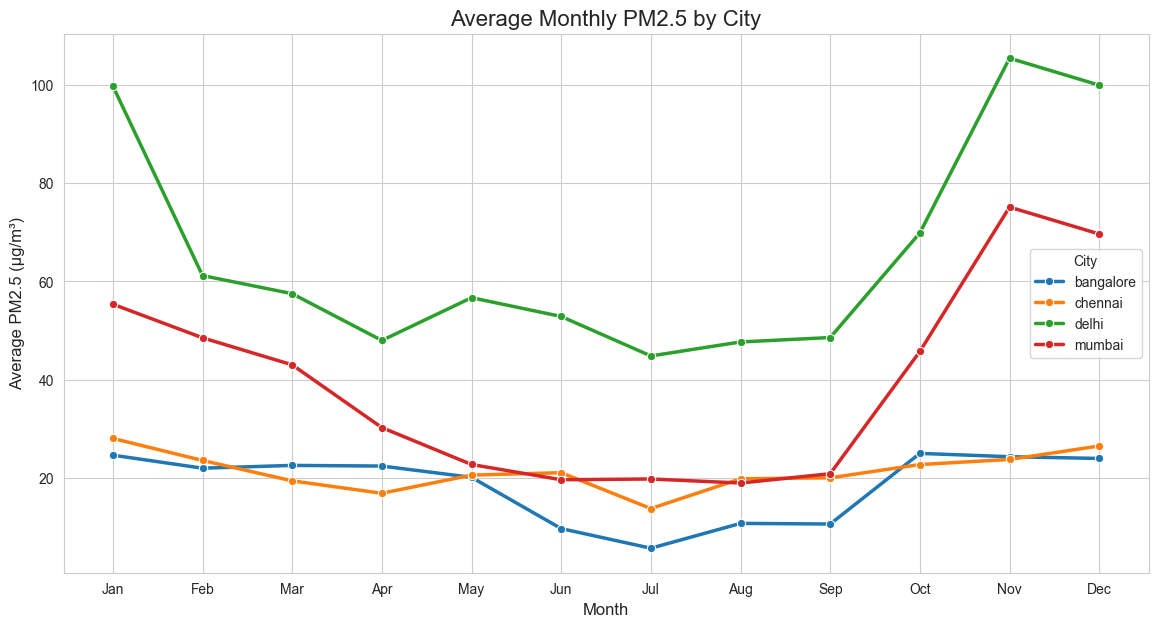

In [5]:
df['month'] = df.index.month
monthly_avg = df.groupby(['city', 'month'])['pm2_5'].mean().reset_index()
    
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_avg, x='month', y='pm2_5', hue='city', marker='o', linewidth=2.5)
    
plt.title('Average Monthly PM2.5 by City', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average PM2.5 (μg/m³)', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='City')
plt.show()
   

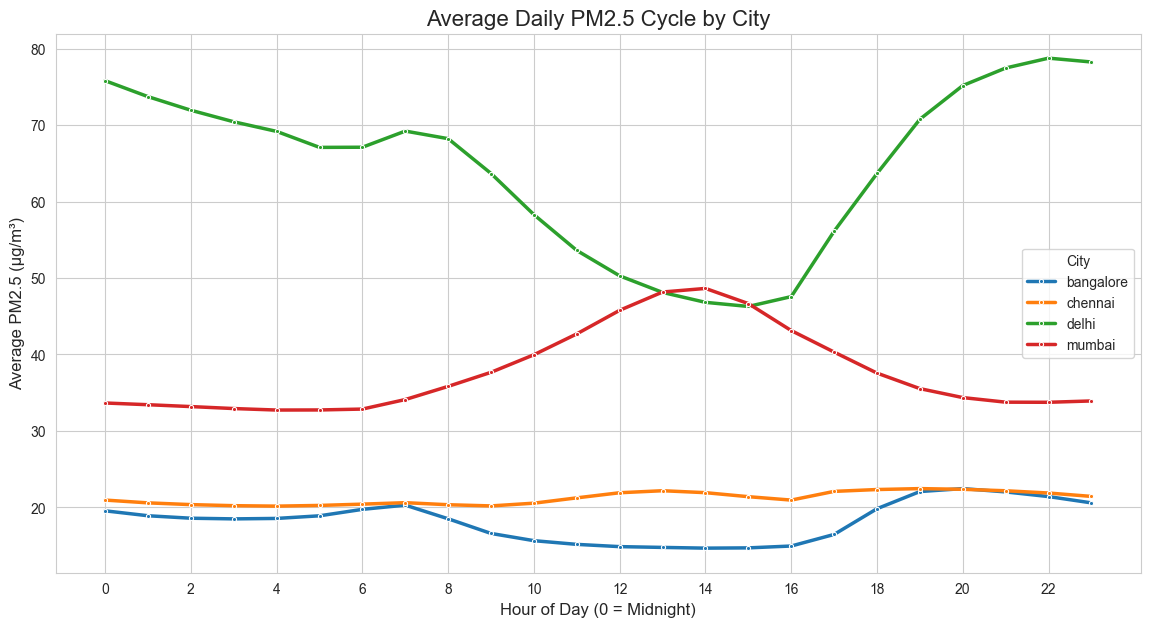

In [9]:
df['hour'] = df.index.hour
hourly_avg = df.groupby(['city', 'hour'])['pm2_5'].mean().reset_index()
    
plt.figure(figsize=(14, 7))
sns.lineplot(data=hourly_avg, x='hour', y='pm2_5', hue='city', marker='.', linewidth=2.5)
    
plt.title('Average Daily PM2.5 Cycle by City', fontsize=16)
plt.xlabel('Hour of Day (0 = Midnight)', fontsize=12)
plt.ylabel('Average PM2.5 (μg/m³)', fontsize=12)
plt.xticks(range(0, 24, 2))
plt.legend(title='City')
plt.show()

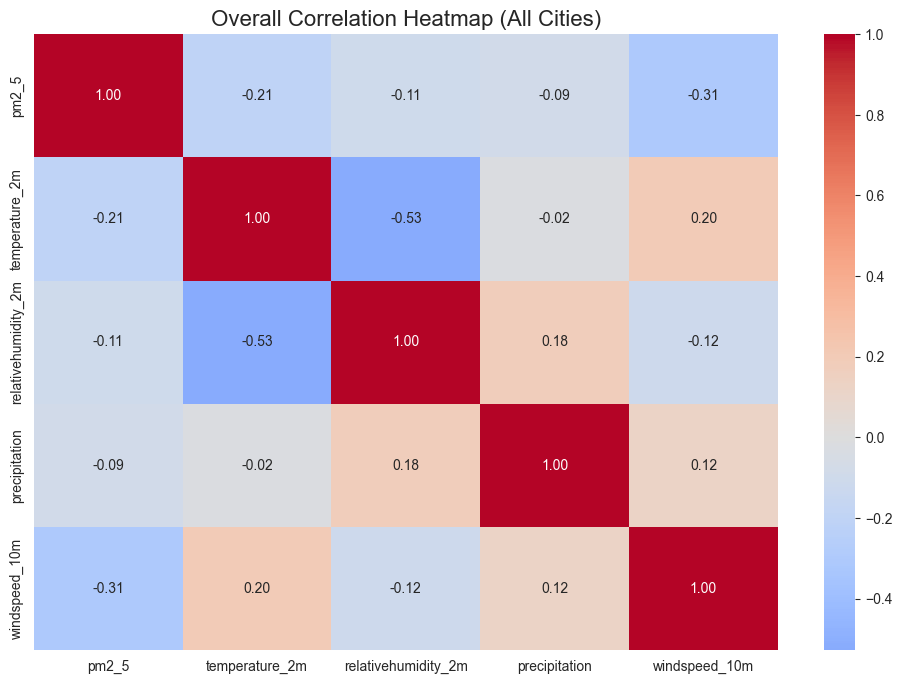

In [11]:
numerical_cols = df.select_dtypes(include=['number']).columns
cols_to_corr = [col for col in numerical_cols if col not in ['month', 'hour']]

corr_matrix = df[cols_to_corr].corr()
    
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Overall Correlation Heatmap (All Cities)', fontsize=16)
plt.show()